## Description

### Context 
In hospitals, medical treatments and surgeries can be categorized into inpatient and outpatient procedures. For patients, it is important to understand the difference between these two types of care, because they impact the length of a patient’s stay in a medical facility and the cost of a procedure. 

#### Inpatient Care (Incare Patient) and Outpatient Care (Outcare Patient)
The difference between an inpatient and outpatient care is how long a patient must remain in the facility where they have the procedure done.
Inpatient care requires overnight hospitalization. Patients must stay at the medical facility where their procedure was done (which is usually a hospital) for at least one night. During this time, they remain under the supervision of a nurse or doctor.
Patients receiving outpatient care do not need to spend a night in a hospital. They are free to leave the hospital once the procedure is over. In some exceptional cases, they need to wait while anesthesia wears off or to make sure there are not any complications. As long as there are not any serious complications, patients do not have to spend the night being supervised. [source of information: pbmhealth]

### Problem Statement
In today’s world of automation, the skills and knowledge of a person could be utilized at the best places possible by automating tasks wherever possible. As a part of the hospital automation system, one can build <b>a system that would predict and estimate whether the patient should be categorized as an incare patient or an outcare patient</b> with the help of several data points about the patients, their conditions and lab tests.

#### Objective
Build a machine learning model to predict if the patient should be classified as in care or out care based on the patient's laboratory test result.

#### Evaluation Criteria
Model will be evaluated using F1 Score. 

### About Datasets
The dataset is Electronic Health Record Predicting collected from a private Hospital in Indonesia. It contains the patient's laboratory test results used to determine next patient treatment whether in care or out care.
source : 
* https://dphi.tech
* https://raw.githubusercontent.com/dphi-official/Datasets/master/patient_treat_class/training_set_label.csv

#### Feature Description
* HAEMATOCRIT     | Patient laboratory test result of haematocrit
* HAEMOGLOBINS    | Patient laboratory test result of haemoglobins
* ERYTHROCYTE     | Patient laboratory test result of erythrocyte
* LEUCOCYTE       | Patient laboratory test result of leucocyte
* THROMBOCYTE     |  Patient laboratory test result of thrombocyte
* MCH             | Patient laboratory test result of MCH
* MCHC            | Patient laboratory test result of MCHC
* MCV             | Patient laboratory test result of MCV
* AGE             | Patient age
* SEX             | Patient gender
* SOURCE          | The class target 1.= in care patient, 0 = out care patient

## Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Datasets from datasource :
train_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/patient_treat_class/training_set_label.csv" )
# Getting basics information about data : 
#print(train_data.dtypes)
#print(train_data.describe())
#sns.heatmap(train_data.isna())

HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX              object
dtype: object
       HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE    LEUCOCYTE  THROMBOCYTE  \
count  1103.000000   1103.000000  1103.000000  1103.000000  1103.000000   
mean     38.112421     12.718858     4.530635     8.727833   253.418858   
std       5.985201      2.067352     0.783094     5.220740   117.732272   
min      19.600000      6.400000     2.250000     1.400000     8.000000   
25%      34.500000     11.400000     4.070000     5.500000   180.000000   
50%      38.600000     12.900000     4.560000     7.500000   252.000000   
75%      42.400000     14.200000     5.030000    10.300000   315.000000   
max      56.300000     18.200000     7.480000    60.800000  1183.000000   

               MCH         MCHC          MCV          AGE  
count  110

<AxesSubplot:>

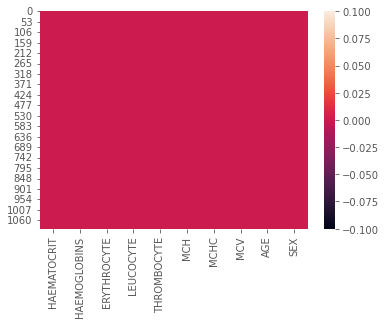

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/patient_treat_class/testing_set_label.csv')
# Getting basics information about data : 
print(test_data.dtypes)
print(test_data.describe())
sns.heatmap(test_data.isna())

* All of the features in this dataset have numerical type data, whether int or float. 
* No missing value is found in every features.

0    1992
1    1317
Name: SOURCE, dtype: int64


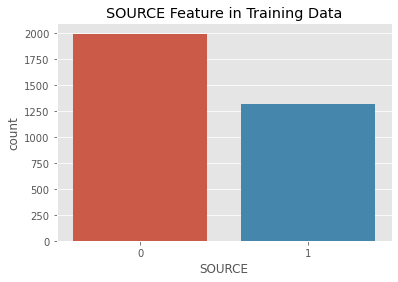

In [ ]:
# Checking if the data is imbalance
sns.countplot(x='SOURCE',data=train_data)
plt.title('SOURCE Feature in Training Data')
print(train_data.SOURCE.value_counts())

There is significant difference between sum of 0 (outcare) and 1 (incare) patient.
* delta = 675 

Training Data :
M    1743
F    1566
Name: SEX, dtype: int64
Total :  3309
Test Data :
F    556
M    547
Name: SEX, dtype: int64
Total :  1103


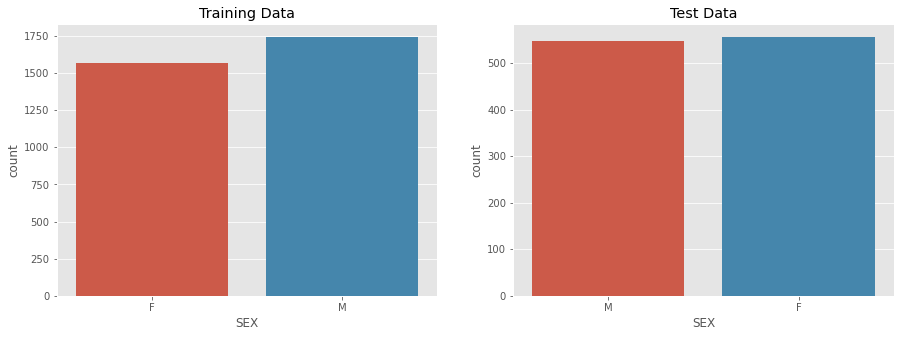

In [ ]:
## Analyzing SEX Features
### Train Data and Test Data Comparission
fig, axs = plt.subplots(1, 2,figsize=(15,5))
axs[0].set_title('Training Data')
sns.countplot(ax=axs[0],x='SEX',data=train_data)
axs[1].set_title('Test Data')
sns.countplot(ax=axs[1],x='SEX',data=test_data)

print('Training Data :',train_data.SEX.value_counts(),sep='\n')
print('Total : ', train_data.SEX.count())
print('Test Data :',test_data.SEX.value_counts(),sep='\n')
print('Total : ', test_data.SEX.count())



In [ ]:
### Pre Data Processing
#### F selected to be base model
train_data['SEX']=train_data['SEX'].apply(lambda x: 0 if x=='F' else 1).astype('int64')
test_data['SEX']=test_data['SEX'].apply(lambda x: 0 if x=='F' else 1).astype('int64')

Text(0.5, 0.98, 'Pearson Correlation of Possible Features')

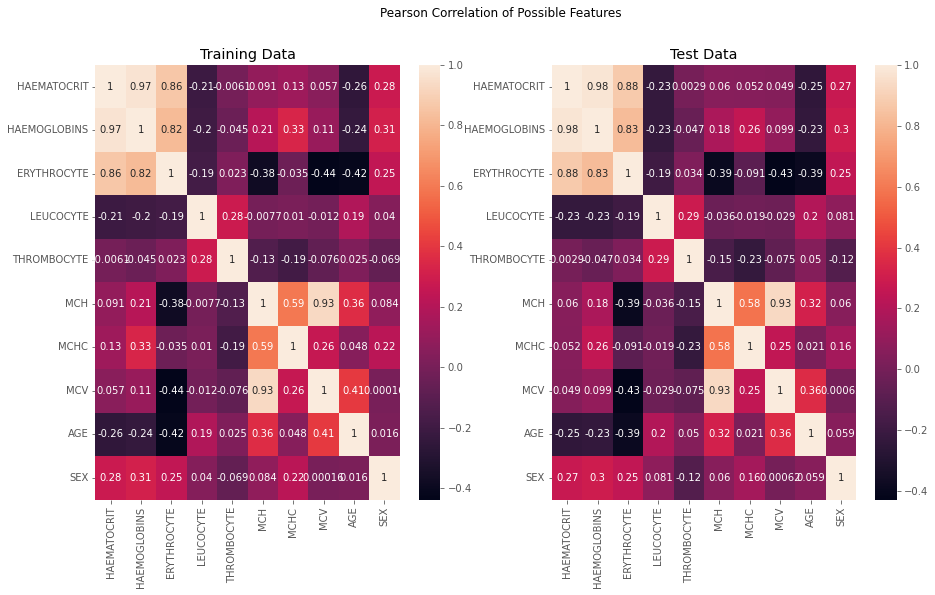

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(15,8))
axs[0].set_title('Training Data')
sns.heatmap(train_data.iloc[:,:-1].corr(),annot=True,ax=axs[0])
axs[1].set_title('Test Data')
sns.heatmap(test_data.corr(),annot=True,ax=axs[1])
plt.suptitle('Pearson Correlation of Possible Features')

> Analysis : 
* HAEMATOCRIT, HAEMOGLOBINS, ERYTHROCYTE are highly correlated
* MCH, MCV are highly correlated
> Solution :
* let it what it is
* Choose either one or two of the feature that are HIGHLY CORRELATED for model building (to <b>prevent multi-colinearity </b>)

HAEMATOCRIT    -0.272349
HAEMOGLOBINS   -0.254954
ERYTHROCYTE    -0.238046
LEUCOCYTE       0.139689
THROMBOCYTE    -0.229550
MCH            -0.002167
MCHC            0.026026
MCV            -0.013600
AGE             0.113494
SEX             0.057224
SOURCE          1.000000
Name: SOURCE, dtype: float64


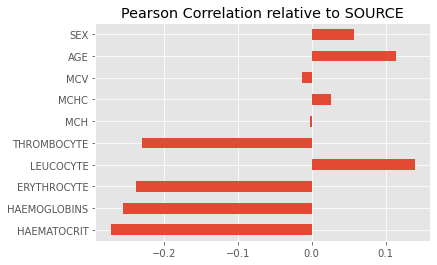

In [ ]:
train_data.corr()['SOURCE'].iloc[:-1].plot(kind='barh',title='Pearson Correlation relative to SOURCE')
print(train_data.corr()['SOURCE'])

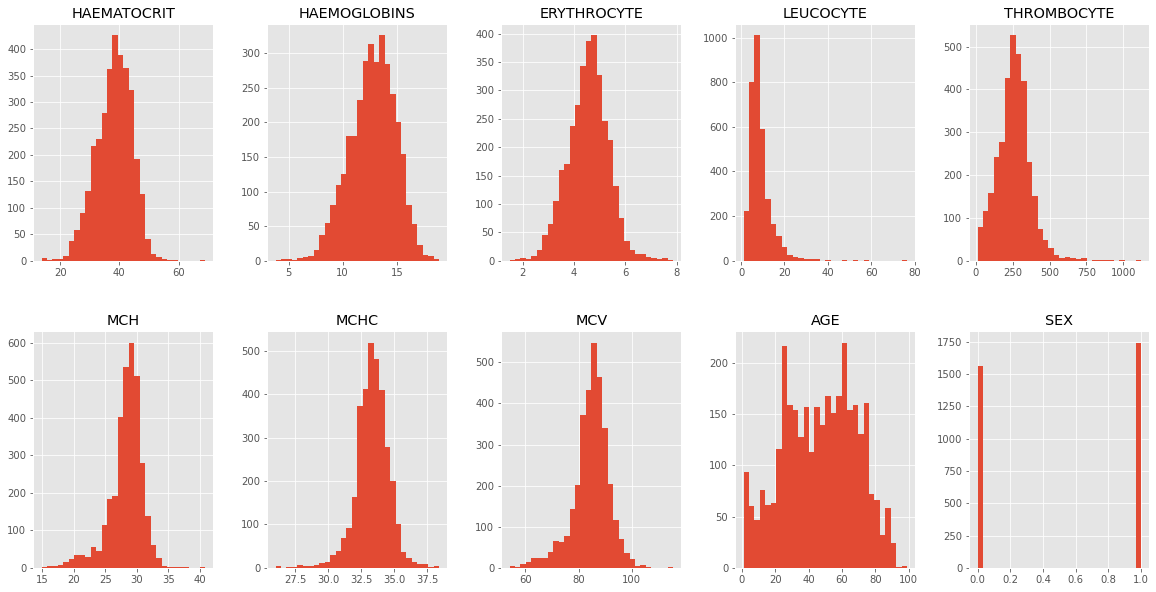

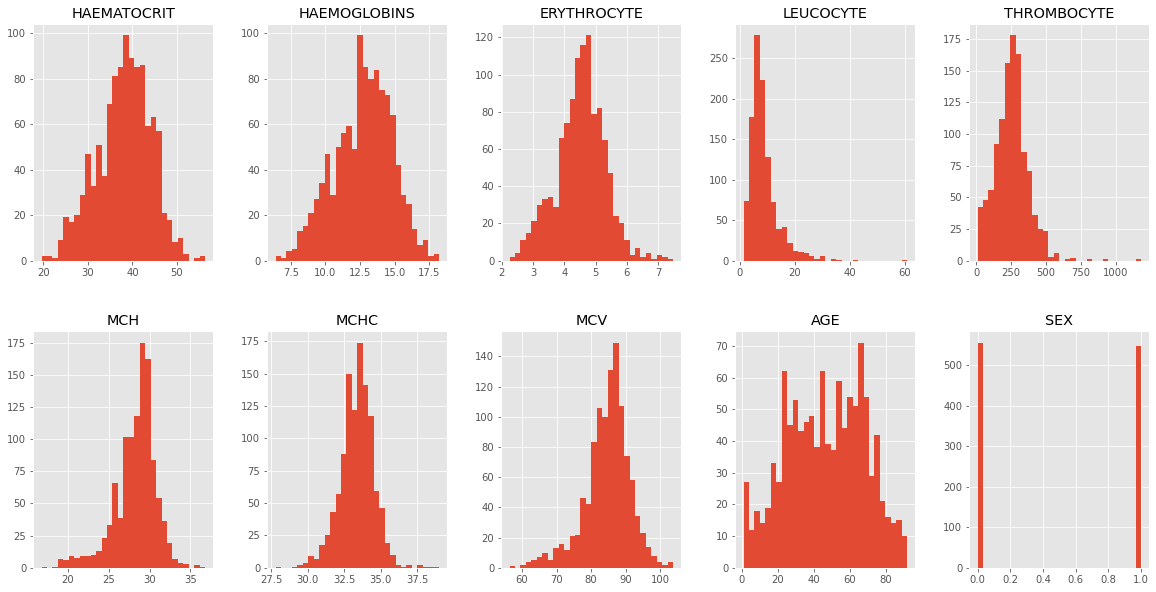

In [ ]:

train_data.iloc[:,:-1].hist(figsize=(20,10), layout=(2, 5), bins = 30,);
test_data.hist(figsize=(20,10), layout=(2, 5), bins = 30);


Analysis : 
* There are no great evidence to show that the distribution of training and test data has significant difference

In [ ]:
# Concating data
total_data = pd.concat([train_data.iloc[:,:-1],test_data],axis=0)
total_data
arr = [total_data,train_data.iloc[:,:-1],test_data]
for i in arr:
  print(i.shape)

(4412, 10)
(3309, 10)
(1103, 10)


HAEMATOCRIT        AxesSubplot(0.125,0.536818;0.133621x0.343182)
HAEMOGLOBINS    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
ERYTHROCYTE      AxesSubplot(0.44569,0.536818;0.133621x0.343182)
LEUCOCYTE       AxesSubplot(0.606034,0.536818;0.133621x0.343182)
THROMBOCYTE     AxesSubplot(0.766379,0.536818;0.133621x0.343182)
MCH                   AxesSubplot(0.125,0.125;0.133621x0.343182)
MCHC               AxesSubplot(0.285345,0.125;0.133621x0.343182)
MCV                 AxesSubplot(0.44569,0.125;0.133621x0.343182)
AGE                AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

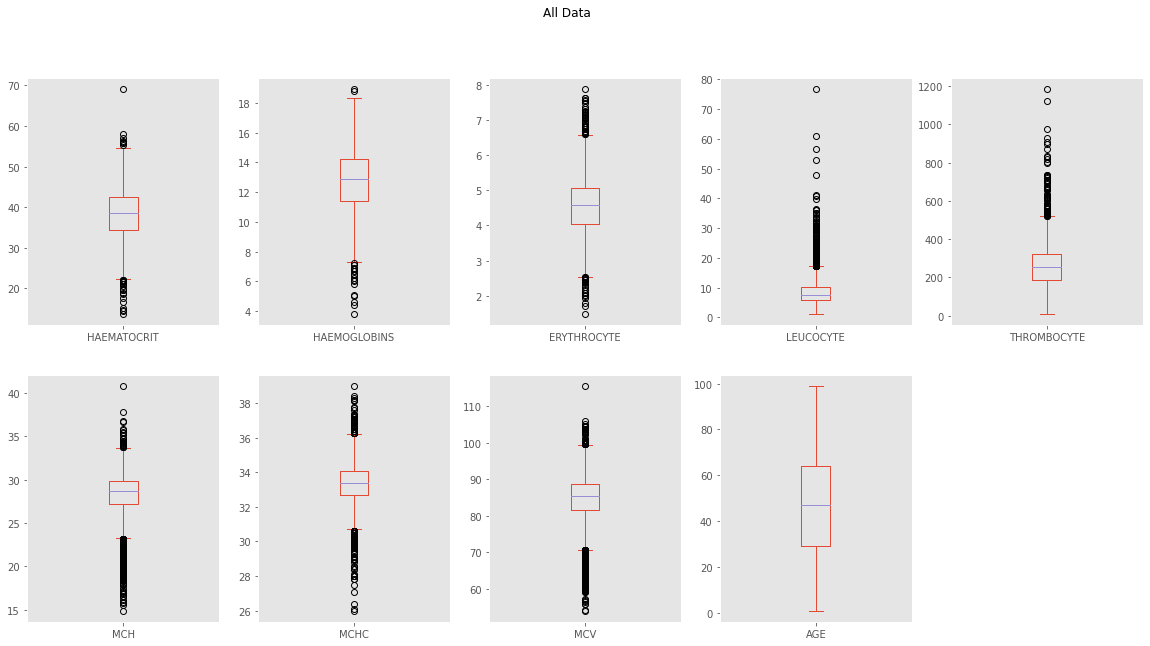

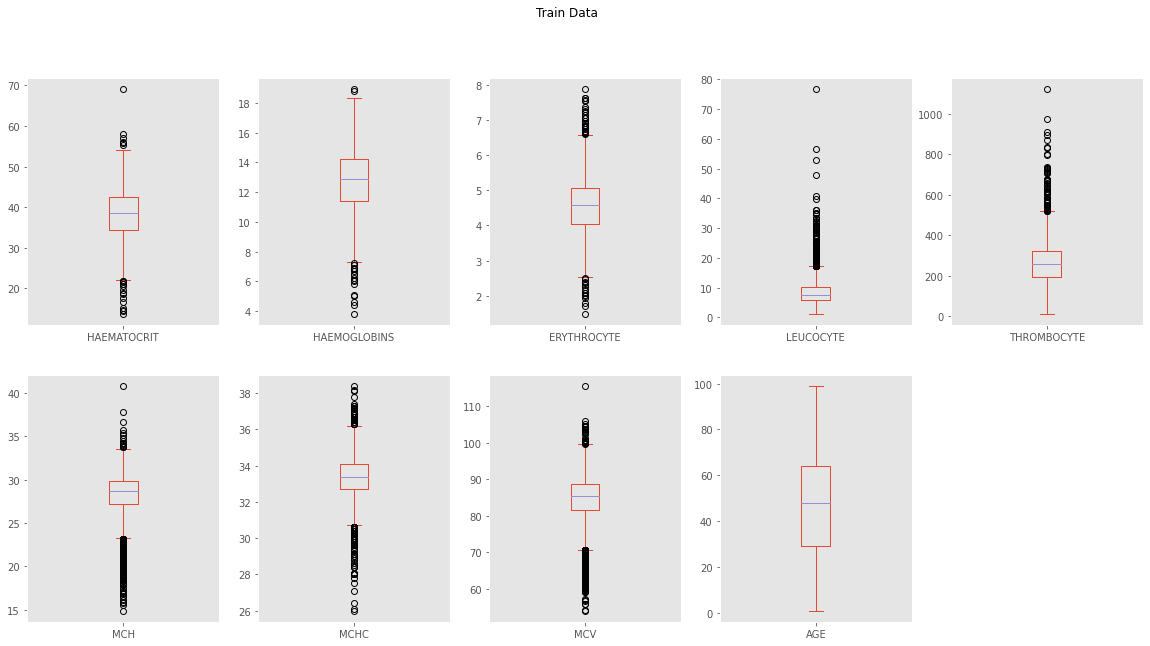

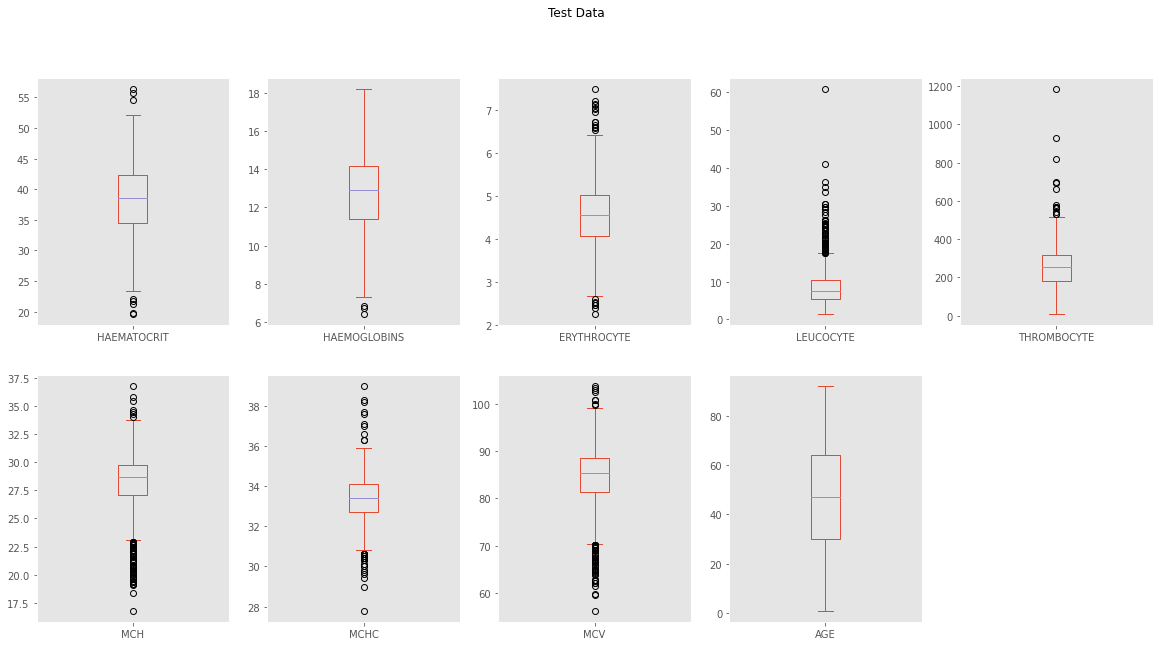

In [ ]:
## Outlier Detection
total_data.iloc[:,:-1].plot(kind='box',figsize=(20,10), subplots=True,grid=False, layout=(2, 5),title = f'All Data')
train_data.iloc[:,:-2].plot(kind='box',figsize=(20,10), subplots=True,grid=False, layout=(2, 5),title = f'Train Data')
test_data.iloc[:,:-1].plot(kind='box',figsize=(20,10), subplots=True,grid=False, layout=(2, 5),title = f'Test Data')

> Analysis : 
* All data have rougly same IQR value on each data feature

Analysis : 
* All Features have Ouliers except for AGE.

### Deep Dive Analytics

In [ ]:
train_data.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

In [ ]:
train_data.iloc[:,:-1].groupby(by='SEX',as_index=False).median()

,SEX,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
0,0,37.1,12.3,4.38,7.6,267.0,28.5,33.2,85.4,47.0
1,1,41.2,13.8,4.83,7.6,250.0,28.9,33.6,85.3,49.0


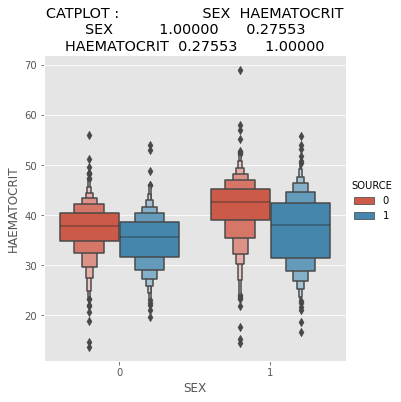

In [ ]:
sns.catplot(x="SEX", y="HAEMATOCRIT", hue="SOURCE", kind="boxen", data=train_data)
plt.title(f'CATPLOT : {train_data[["SEX","HAEMATOCRIT"]].corr()}');

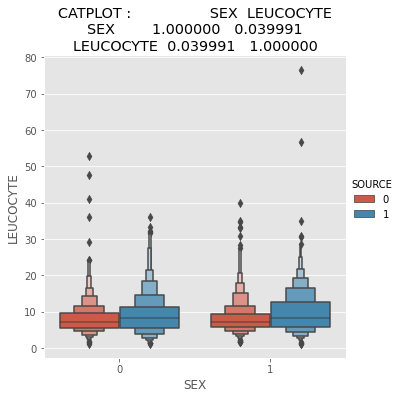

In [ ]:
sns.catplot(x="SEX", y="LEUCOCYTE", hue="SOURCE", kind="boxen", data=train_data)
plt.title('CATPLOT : SEX-LEUCOCYTE')
plt.title(f'CATPLOT : {train_data[["SEX","LEUCOCYTE"]].corr()}');

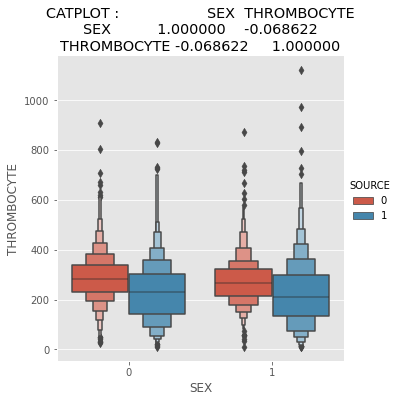

In [ ]:
sns.catplot(x="SEX", y="THROMBOCYTE", hue="SOURCE", kind="boxen", data=train_data)
plt.title(f'CATPLOT : {train_data[["SEX","THROMBOCYTE"]].corr()}');

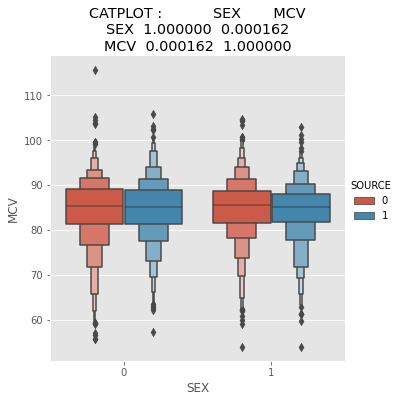

In [ ]:
sns.catplot(x="SEX", y="MCV", hue="SOURCE", kind="boxen", data=train_data)
plt.title(f'CATPLOT : {train_data[["SEX","MCV"]].corr()}');

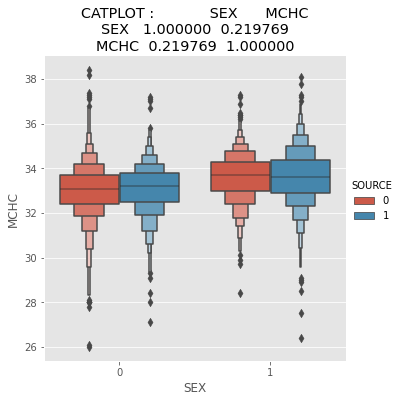

In [ ]:
sns.catplot(x="SEX", y="MCHC", hue="SOURCE", kind="boxen", data=train_data)
plt.title(f'CATPLOT : {train_data[["SEX","MCHC"]].corr()}');

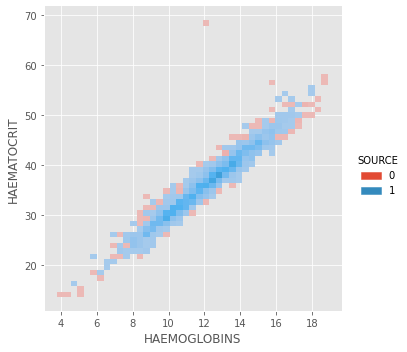

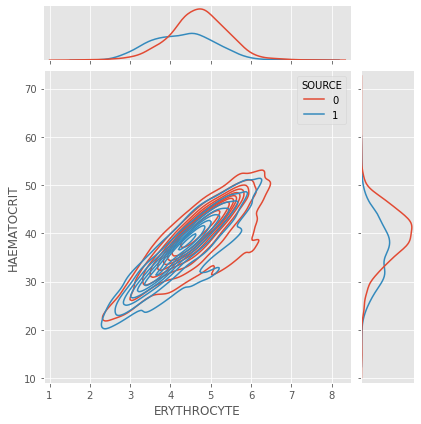

In [ ]:
sns.displot(data=train_data, x="HAEMOGLOBINS", y="HAEMATOCRIT", hue="SOURCE")
sns.jointplot(data=train_data,x="ERYTHROCYTE", y="HAEMATOCRIT", hue="SOURCE",kind="kde")

> Analysis : 
- Proof that it is not good for choosing 2 variables that are really highly correlated to each other as predictor, it can cause multi-colinearity

### Machine Learning Modelling 

#### Data Preprocessing

In [ ]:
### Importing Library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score

In [ ]:
train_data.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

In [ ]:
### Droping Data Feature
new_train = train_data.drop(['HAEMOGLOBINS', 'ERYTHROCYTE','MCH'],axis=1)
new_train.columns

Index(['HAEMATOCRIT', 'LEUCOCYTE', 'THROMBOCYTE', 'MCHC', 'MCV', 'AGE', 'SEX',
       'SOURCE'],
      dtype='object')

 before : 3309
 outlier : 0
(3309, 8)


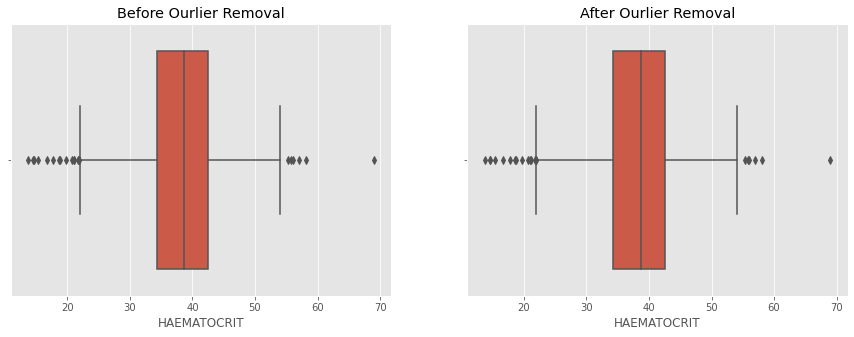

In [ ]:
### Outlier Removing : 'HAEMATOCRIT',
data = 'HAEMATOCRIT'
q1,q3= train_data[data].quantile([0.25,0.75])
iqr = q3-q1
n = 10
lb = q1 - (n*iqr)
ub = q3 + (n*iqr)

print(f' before : {len(train_data[data])}')
print(f' outlier : {len(new_train[(new_train[data]<lb) | (new_train[data]>ub)])}')

### Performing Outlier Removal
new_train = new_train[(new_train[data]>=lb) & (new_train[data]<=ub)]
fig, axs = plt.subplots(1, 2,figsize=(15,5),sharex=True)
axs[0].set_title('Before Ourlier Removal')
sns.boxplot(train_data[data],ax=axs[0])
axs[1].set_title('After Ourlier Removal')
sns.boxplot(new_train[data],ax=axs[1])
print(new_train.shape)

 before : 3309
 outlier : 2
(3307, 8)


<AxesSubplot:title={'center':'After Ourlier Removal'}, xlabel='LEUCOCYTE'>

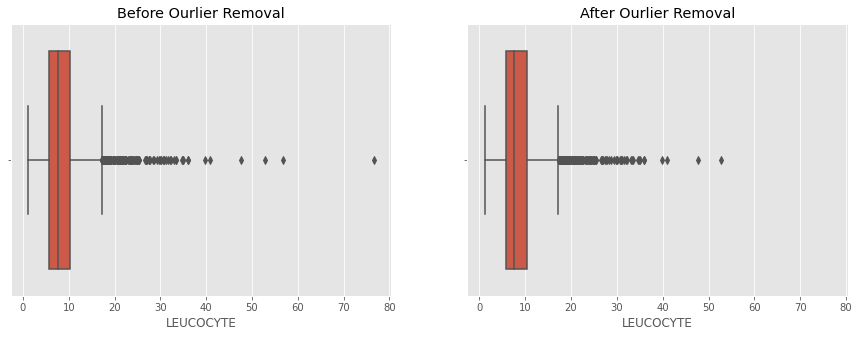

In [ ]:
### Outlier Removing : 'LEUCOCYTE',
data = 'LEUCOCYTE'
q1,q3= train_data[data].quantile([0.25,0.75])
iqr = q3-q1
n = 10
lb = q1 - (n*iqr)
ub = q3 + (n*iqr)

print(f' before : {len(train_data[data])}')
print(f' outlier : {len(new_train[(new_train[data]<lb) | (new_train[data]>ub)])}')

### Performing Outlier Removal
new_train = new_train[(new_train[data]>=lb) & (new_train[data]<=ub)]
print(new_train.shape)
fig, axs = plt.subplots(1, 2,figsize=(15,5),sharex=True)
axs[0].set_title('Before Ourlier Removal')
sns.boxplot(train_data[data],ax=axs[0])
axs[1].set_title('After Ourlier Removal')
sns.boxplot(new_train[data],ax=axs[1])

 before : 3309
 outlier : 0
(3307, 8)


<AxesSubplot:title={'center':'After Ourlier Removal'}, xlabel='THROMBOCYTE'>

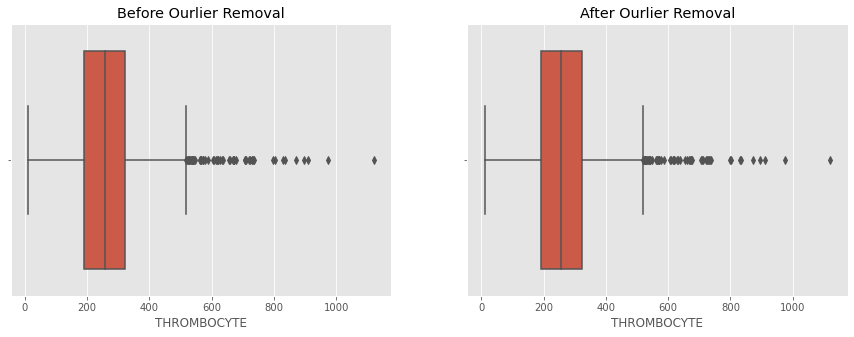

In [ ]:
### Outlier Removing : 'THROMBOCYTE',
data = 'THROMBOCYTE'
q1,q3= train_data[data].quantile([0.25,0.75])
iqr = q3-q1
n = 10
lb = q1 - (n*iqr)
ub = q3 + (n*iqr)

print(f' before : {len(train_data[data])}')
print(f' outlier : {len(new_train[(new_train[data]<lb) | (new_train[data]>ub)])}')

### Performing Outlier Removal
new_train = new_train[(new_train[data]>=lb) & (new_train[data]<=ub)]
print(new_train.shape)
fig, axs = plt.subplots(1, 2,figsize=(15,5),sharex=True)
axs[0].set_title('Before Ourlier Removal')
sns.boxplot(train_data[data],ax=axs[0])
axs[1].set_title('After Ourlier Removal')
sns.boxplot(new_train[data],ax=axs[1])

 before : 3309
 outlier : 0
(3307, 8)


<AxesSubplot:title={'center':'After Ourlier Removal'}, xlabel='MCHC'>

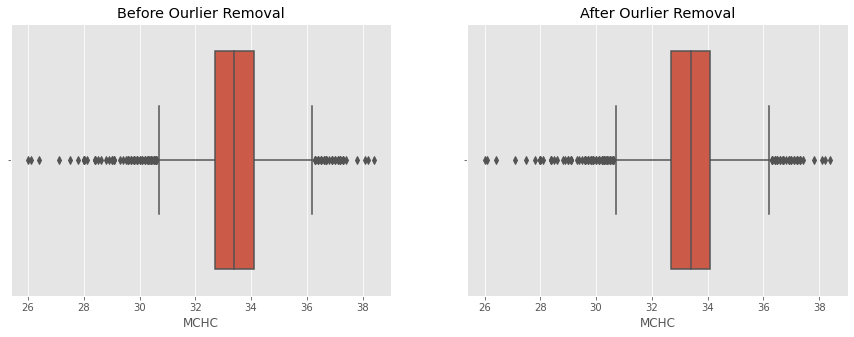

In [ ]:
### Outlier Removing : 'MCHC',
data='MCHC'
q1,q3= train_data[data].quantile([0.25,0.75])
iqr = q3-q1
n = 10
lb = q1 - (n*iqr)
ub = q3 + (n*iqr)

print(f' before : {len(train_data[data])}')
print(f' outlier : {len(new_train[(new_train[data]<lb) | (new_train[data]>ub)])}')

### Performing Outlier Removal
new_train = new_train[(new_train[data]>=lb) & (new_train[data]<=ub)]
print(new_train.shape)
fig, axs = plt.subplots(1, 2,figsize=(15,5),sharex=True)
axs[0].set_title('Before Ourlier Removal')
sns.boxplot(train_data[data],ax=axs[0])
axs[1].set_title('After Ourlier Removal')
sns.boxplot(new_train[data],ax=axs[1])

 before : 3309
 outlier : 0
(3307, 8)


<AxesSubplot:title={'center':'After Ourlier Removal'}, xlabel='MCV'>

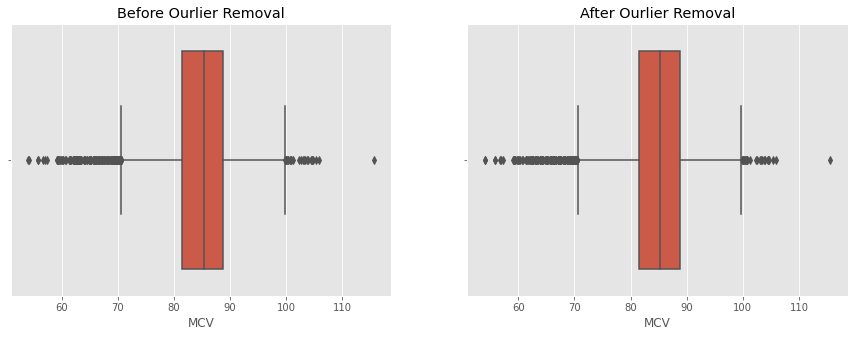

In [ ]:
### Outlier Removing : 'MCV',
data='MCV'
q1,q3= train_data[data].quantile([0.25,0.75])
iqr = q3-q1
n = 10
lb = q1 - (n*iqr)
ub = q3 + (n*iqr)

print(f' before : {len(train_data[data])}')
print(f' outlier : {len(new_train[(new_train[data]<lb) | (new_train[data]>ub)])}')

### Performing Outlier Removal
new_train = new_train[(new_train[data]>=lb) & (new_train[data]<=ub)]
print(new_train.shape)
fig, axs = plt.subplots(1, 2,figsize=(15,5),sharex=True)
axs[0].set_title('Before Ourlier Removal')
sns.boxplot(train_data[data],ax=axs[0])
axs[1].set_title('After Ourlier Removal')
sns.boxplot(new_train[data],ax=axs[1])

<AxesSubplot:>

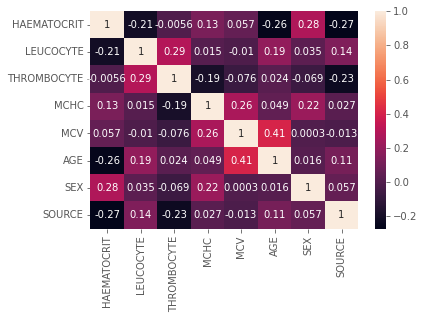

In [ ]:
sns.heatmap(new_train.corr(),annot=True)

In [ ]:
X = new_train.iloc[:, :-1].values
y = new_train.iloc[:, -1].values
# Splitting Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
# Performing Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
### PCA
from sklearn.decomposition import PCA
X_pca = new_train.iloc[:, :-1].values
y_pca = new_train.iloc[:, -1].values
# Splitting Dataset 
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size = 0.25, random_state = 10)
# Performing Feature Scaling
sc = StandardScaler()
X_train_pca = sc.fit_transform(X_train_pca)
X_test_pca = sc.transform(X_test_pca)
# Performing PCA
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)


In [ ]:
### LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X_lda = new_train.iloc[:, :-1].values
y_lda = new_train.iloc[:, -1].values
# Splitting Dataset 
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y_lda, test_size = 0.25, random_state = 10)
# Performing Feature Scaling
sc = StandardScaler()
X_train_lda = sc.fit_transform(X_train_lda)
X_test_lda = sc.transform(X_test_lda)
# Performing LDA
lda = LDA(n_components = 1)
X_train_lda = lda.fit_transform(X_train_lda, y_train_lda)
X_test_lda = lda.transform(X_test_lda)

#### Classification

In [ ]:
### Importing Machine Learning Library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

### Importing Scoring Library
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [ ]:
def simple_model(x,y,splits,test_pct):
    model={
        'knn':{
            'model':KNeighborsClassifier(),
            'params':{
                'n_neighbors':[5,10],
                'weights':['uniform','distance'],
                'algorithm':['auto','ball_tree','kd_tree','brute'],
            }  
        },
        'decission_tree':{
            'model':DecisionTreeClassifier(),
            'params':{
                'criterion':['gini','entropy'],
                'splitter':['best','random']
            }
        },
        'svc':{
            'model':SVC(),
            'params':{
                'kernel':['linear','poly','rbf','sigmoid'],
                'gamma':['auto','scale']
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{
                'penalty':['l1', 'l2','elasticnet','none'],
                'C':[0.2,0.4,0.6,0.8,1],
        },
        
    }
    }
    accuracy_score=[]
    cv=ShuffleSplit(n_splits=splits,test_size=test_pct, random_state=0)
    for model_name, config in model.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=True)
        gs.fit(x,y)
        accuracy_score.append({
            'model':model_name,
            'accuracy':gs.best_score_,
            'best_params':gs.best_params_,
        })
    
    return pd.DataFrame(accuracy_score,columns=['model','accuracy','best_params'])

In [ ]:
def boost_model(x,y,splits,test_pct):
    model={
        # Masih Error :<
        # 'xgb':{
        #     'model':xgboost(),
        #     'params':{
        #         #'eta':[0.1,0.2,0.4,0.6,0.8,1],
        #         'gamma':[0.01,0.1,1,10,100],
        #     },
        # },
        'adaboost':{
            'model':AdaBoostClassifier(),
            'params':{
                'learning_rate':[0.2,0.4,0.6,0.8,1],
                #'criterion':['friendman_mse','squared_error','mse','mae'],
                'algorithm':['SAMME','SAMME.R'],
                'random_state':[1],
            },
        },
        'gradientboost':{
            'model':GradientBoostingClassifier(),
            'params':{
                'loss':['deviance', 'exponential'],
                'learning_rate':[0.2,0.4,0.6,0.8,1],
                #'criterion':['friendman_mse','squared_error','mse','mae'],
                'max_depth':[1,2,3,4],
                'max_features':['auto','sqrt','log2'],
                'random_state':[1],
            },
        },
    }
    accuracy_score=[]
    cv=ShuffleSplit(n_splits=splits,test_size=test_pct, random_state=0)
    for model_name, config in model.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=True)
        gs.fit(x,y)
        accuracy_score.append({
            'model':model_name,
            'accuracy':gs.best_score_,
            'best_params':gs.best_params_,
        })
    
    return pd.DataFrame(accuracy_score,columns=['model','accuracy','best_params'])

In [ ]:
def naive_model(x,y,splits,test_pct):
    model={
        'gauss':{
            'model':GaussianNB(),
            'params':{
                'priors':[None,2,4],
            },
        },
        'bernoulli':{
            'model':BernoulliNB(),
            'params':{
                'alpha':[0,1,2],
                'fit_prior':[True,False]
            }
        }
    }
    accuracy_score=[]
    cv=ShuffleSplit(n_splits=splits,test_size=test_pct, random_state=0)
    for model_name, config in model.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=True)
        gs.fit(x,y)
        accuracy_score.append({
            'model':model_name,
            'accuracy':gs.best_score_,
            'best_params':gs.best_params_,
        })
    
    return pd.DataFrame(accuracy_score,columns=['model','accuracy','best_params'])

In [ ]:
def run_model(x,y,splits,test_pct):
  simple = simple_model(x,y,splits,test_pct)
  boost = boost_model(x,y,splits,test_pct)
  naive = naive_model(x,y,splits,test_pct)
  data = pd.concat([simple,boost,naive],axis=0)
  data = data.sort_values(by=['accuracy'],ascending=False)
  data.plot(kind='bar',x='model',y='accuracy')
  plt.legend()
  return data;

,model,accuracy,best_params
2,svc,0.721371,"{'gamma': 'scale', 'kernel': 'rbf'}"
1,gradientboost,0.717339,"{'learning_rate': 0.4, 'loss': 'deviance', 'ma..."
0,adaboost,0.715591,"{'algorithm': 'SAMME', 'learning_rate': 0.2, '..."
3,logistic_regression,0.712231,"{'C': 0.2, 'penalty': 'none'}"
0,gauss,0.712231,{'priors': None}
1,bernoulli,0.700000,"{'alpha': 0, 'fit_prior': True}"
0,knn,0.697446,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig..."
1,decission_tree,0.629973,"{'criterion': 'entropy', 'splitter': 'random'}"


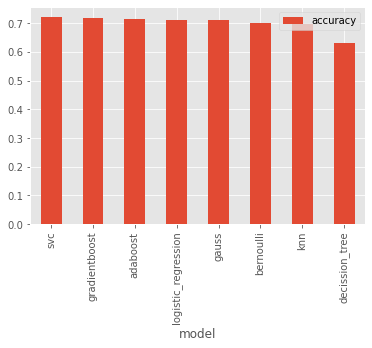

In [ ]:
run_model(X_train_lda,y_train_lda,15,0.2)

,model,accuracy,best_params
2,svc,0.746774,"{'gamma': 'auto', 'kernel': 'rbf'}"
1,gradientboost,0.735753,"{'learning_rate': 0.2, 'loss': 'exponential', ..."
0,knn,0.732661,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig..."
0,gauss,0.714247,{'priors': None}
0,adaboost,0.713978,"{'algorithm': 'SAMME.R', 'learning_rate': 0.4,..."
1,bernoulli,0.701478,"{'alpha': 0, 'fit_prior': True}"
3,logistic_regression,0.693145,"{'C': 0.2, 'penalty': 'none'}"
1,decission_tree,0.653763,"{'criterion': 'entropy', 'splitter': 'best'}"


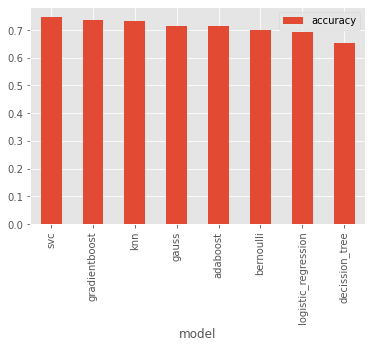

In [ ]:
run_model(X_train_pca,y_train_pca,15,0.2)

,model,accuracy,best_params
2,svc,0.756586,"{'gamma': 'auto', 'kernel': 'rbf'}"
1,gradientboost,0.755242,"{'learning_rate': 0.2, 'loss': 'deviance', 'ma..."
0,adaboost,0.743414,"{'algorithm': 'SAMME', 'learning_rate': 0.8, '..."
0,knn,0.739516,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig..."
0,gauss,0.716263,{'priors': None}
3,logistic_regression,0.713441,"{'C': 0.2, 'penalty': 'none'}"
1,decission_tree,0.662231,"{'criterion': 'gini', 'splitter': 'best'}"
1,bernoulli,0.661156,"{'alpha': 0, 'fit_prior': True}"


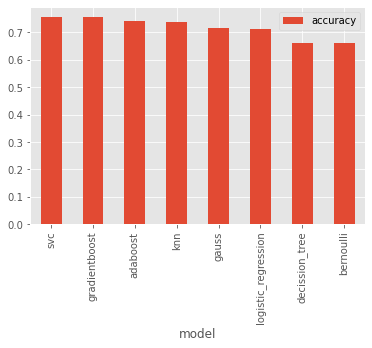

In [ ]:
run_model(X_train,y_train,15,0.2)

#### Evaluation and Model Improvement

In [ ]:
### Importing Scoring Library
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score